In [3]:
import os
import shutil
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.constraints import maxnorm
from tensorflow.keras import constraints


import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # list of DeviceAttributes

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13077029687169244254
]


In [2]:
# original dataset path
original_dataset_dir = 'C:/Users/MOHSEN/JupyterProjects/cv_homework/kaggle_original_data/train'

# creating a directory for smaller dataset
base_dir = 'C:/Users/MOHSEN/JupyterProjects/cv_homework/cats_and_dogs_big'
os.mkdir(base_dir)

In [3]:
# creating a directory for train data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# creating a directory for validation data
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# creating a directory for test data
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
# creating a directory for cats in training data
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# creating a directory for dogs in training data
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [5]:
# creating a directory for cats in validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# creating a directory for dogs in validation data
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [6]:
# creating a directory for cats in test data
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# creating a directory for dogs in test data
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
# copying the first 7500 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# copying the next 2500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# copying the next 2500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# copying the first 7500 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# copying the next 2500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(7500, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# copying the next 2500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 7500
total training dog images: 7500
total validation cat images: 2500
total validation dog images: 2500
total test cat images: 2500
total test dog images: 2500


In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), kernel_constraint=maxnorm(3), input_shape=(150, 150, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), kernel_constraint=maxnorm(3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_constraint=maxnorm(3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_constraint=maxnorm(3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, kernel_constraint=maxnorm(3)))
model.add(layers.Activation('relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [16]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=50, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=300, epochs=100,
                              validation_data=validation_generator, validation_steps=100)

C:\Users\MOHSEN\.conda\envs\gpuwork\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
300/300 [==============================] - 157s 506ms/step - loss: 0.7005 - acc: 0.5900 - val_loss: 0.6445 - val_acc: 0.7180
Epoch 2/100
300/300 [==============================] - 81s 270ms/step - loss: 0.5965 - acc: 0.6750 - val_loss: 0.5289 - val_acc: 0.7575
Epoch 3/100
300/300 [==============================] - 75s 251ms/step - loss: 0.5523 - acc: 0.7143 - val_loss: 0.5288 - val_acc: 0.7305
Epoch 4/100
300/300 [==============================] - 78s 259ms/step - loss: 0.5357 - acc: 0.7295 - val_loss: 0.4831 - val_acc: 0.7575
Epoch 5/100
300/300 [==============================] - 77s 256ms/step - loss: 0.5161 - acc: 0.7490 - val_loss: 0.4821 - val_acc: 0.7825
Epoch 6/100
300/300 [==============================] - 82s 273ms/step - loss: 0.5025 - acc: 0.7588 - val_loss: 0.4353 - val_acc: 0.7975
Epoch 7/100
300/300 [==============================] - 81s 268ms/step - loss: 0.4951 - acc: 0.7591 - val_loss: 0.4825 - val_acc: 0.7885
Epoch 8/100
300/300 [==========================

Epoch 61/100
300/300 [==============================] - 72s 238ms/step - loss: 0.2452 - acc: 0.8974 - val_loss: 0.2127 - val_acc: 0.9045
Epoch 62/100
300/300 [==============================] - 73s 244ms/step - loss: 0.2462 - acc: 0.9014 - val_loss: 0.2607 - val_acc: 0.8875
Epoch 63/100
300/300 [==============================] - 72s 239ms/step - loss: 0.2349 - acc: 0.8998 - val_loss: 0.2438 - val_acc: 0.9060
Epoch 64/100
300/300 [==============================] - 71s 238ms/step - loss: 0.2442 - acc: 0.9009 - val_loss: 0.2716 - val_acc: 0.9125
Epoch 65/100
300/300 [==============================] - 72s 240ms/step - loss: 0.2415 - acc: 0.9012 - val_loss: 0.2174 - val_acc: 0.9145
Epoch 66/100
300/300 [==============================] - 72s 240ms/step - loss: 0.2306 - acc: 0.9013 - val_loss: 0.1974 - val_acc: 0.9190
Epoch 67/100
300/300 [==============================] - 72s 239ms/step - loss: 0.2299 - acc: 0.9026 - val_loss: 0.2759 - val_acc: 0.8935
Epoch 68/100
300/300 [===================

In [19]:
model.save('cats_and_dogs_small_3.h5')

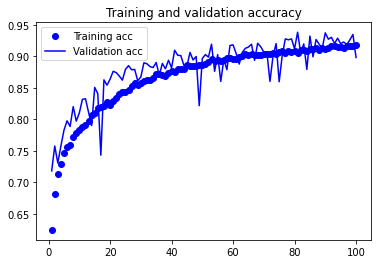

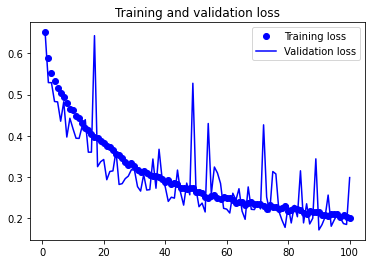

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()